In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
# from tqdm.auto import tqdm
import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

In [3]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [4]:
df.loc[df.gender == 'М', 'gender'] = 'M'  # замена кириллицы на латиницу

In [5]:
df[(df['gender'] == 'M') & (df['income'] != 0)].avg_casa_balance_1Y.mean()

94047.41571844654

In [6]:
df[(df['gender'] == 'F') & (df['income'] != 0)].avg_casa_balance_1Y.mean()

36064.07878469588

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Уровень зарплат в зависимости от типа города

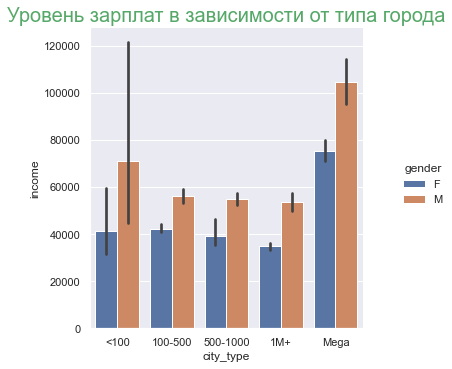

In [8]:
city_type_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.set(style='darkgrid')  

sns.catplot(
    x='city_type', 
    y='income', 
    data=df.query('income > 0'), 
    kind='bar',
    order=city_type_order,
    hue='gender', 
    hue_order=['F', 'M'],
)
plt.title('Уровень зарплат в зависимости от типа города', size=20, color='g');

##### Большой разброс (у мужчин более выражен) по зарплатам в городах с населением меньше 100 тыс жителей, но при этом средний уровень зарплаты  выше чем в других типах городов, за исключением мегаполисов для мужчин и мегаполисов и городов 100 - 500 тыс жителей для женщин. 

### Линейная диаграмма  один к одному для сравниваемых показателей

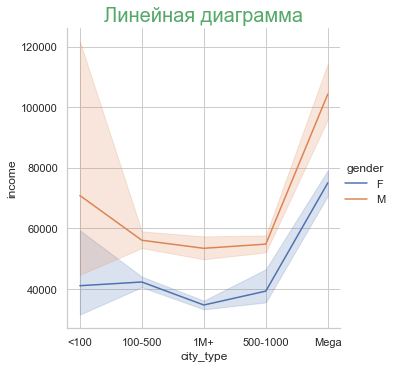

In [44]:
sns.relplot(
    x='city_type', 
    y='income', 
    data=df.query('income > 0'),
    kind='line',
    hue='gender', 
    hue_order=['F', 'M'],
)
plt.title('Линейная диаграмма', size=20, color='g');

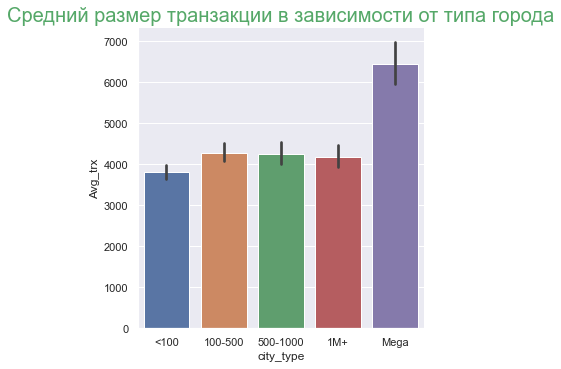

In [12]:
sns.catplot(
    x='city_type', 
    y='Avg_trx', 
    data=df.query('income > 0'), 
    kind='bar',
    order=city_type_order,
)
plt.title('Средний размер транзакции в зависимости от типа города', size=20, color='g');

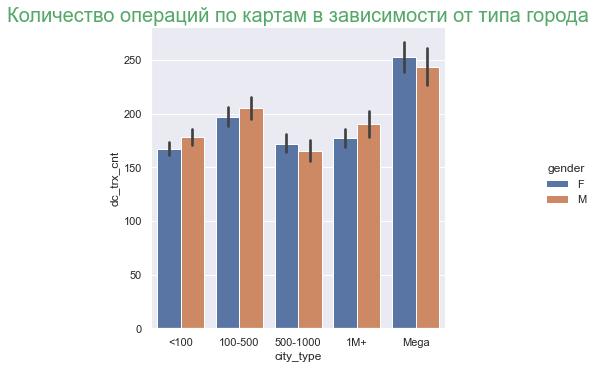

In [28]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df.query('income > 0'), 
    kind='bar',
    order=city_type_order,
    hue='gender', 
    hue_order=['F', 'M'],
)
plt.title('Количество операций по картам в зависимости от типа города', size=20, color='g');

### Помимо мегаполисов, также высокое количество операций по картам в городах с численностью населения 100-500 тыс. жителей

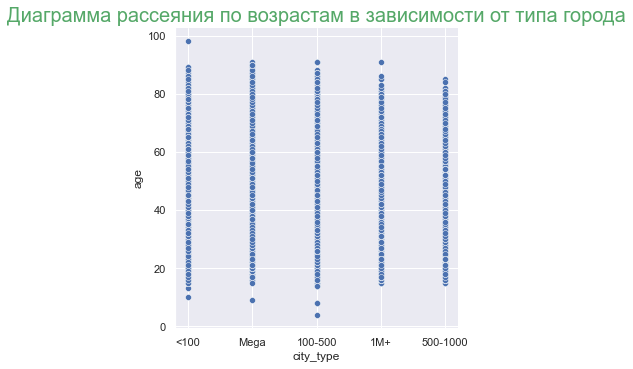

In [29]:
sns.relplot(
    x='city_type',
    y='age',
    data=df,
    row_order=city_type_order,
    kind='scatter',
)
plt.title('Диаграмма рассеяния по возрастам в зависимости от типа города', size=20, color='g');

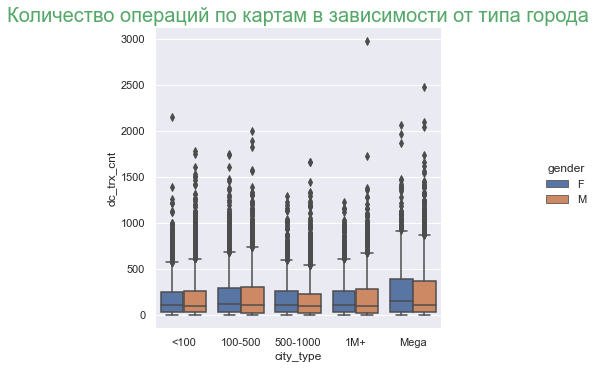

In [33]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df.query('income > 0'), 
    kind='box',
    order=city_type_order,
    hue='gender', 
    hue_order=['F', 'M'],
)
plt.title('Количество операций по картам в зависимости от типа города', size=20, color='g');

#### Много выбросов в исходных данных?

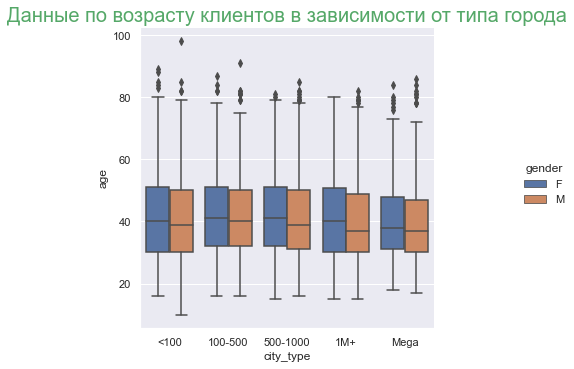

In [35]:
sns.catplot(
    x='city_type', 
    y='age', 
    data=df.query('income > 0'), 
    kind='box',
    order=city_type_order,
    hue='gender', 
    hue_order=['F', 'M'],
)
plt.title('Данные по возрасту клиентов в зависимости от типа города', size=20, color='g');

#### В мегаполисах средний возраст клиента ниже чем в других городах. Возможно может косвенно указывать на отъезд в мегаполисы

D:\Dev\DS-homeworks\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Dev\DS-homeworks\venv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


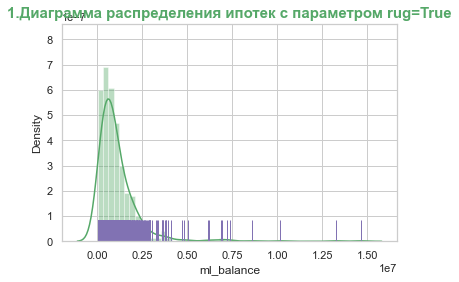

In [43]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.query('ml_balance > 0').ml_balance,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения ипотек с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

### Либо в выборке много "почти выплативших" ипотеку, либо в среднем клиенты могут позволить себе только недорогую недвижимость